# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## 데이터셋 정보

train.csv

    1. idx = 인덱스
    2. class = 0~4
        class 0; 협박 대화
        class 1; 갈취 대화
        class 2; 직장 내 괴롭힘 대화
        class 3; 기타 괴롭힘 대화
    3. conversation = \n으로 구분된 멀티턴 텍스트 대화

test.json

    1. t_### = 인덱스
    2. text = 대화

submission.csv

    1. file_name = 인덱스
    2. class = 예측값

## 평가기준 
> - 데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?
> - Task에 알맞게 적절한 모델을 찾아보고 선정했는가?
> - 성능향상을 위해 논리적으로 접근했는가?
> - 결과 도출을 위해 여러가지 시도를 진행했는가?
> - 도출된 결론에 충분한 설득력이 있는가?
> - 적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?
> - 발표가 매끄럽게 진행되었고 발표시간을 준수하였는지? (발표 10분-15분)

## TO-DO-LIST
- 일반 대화 데이터셋 만들어야함 (800-1000개정도)
- ppt 제작
- 평가지표 : f1-score

## EDA


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [73]:
cate = train_data['class'].unique().tolist()

In [82]:
cate

['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화']

In [83]:
intimidation = train_data[train_data['class'] == '협박 대화']
extortion = train_data[train_data['class'] == '갈취 대화']
harassment_workplace = train_data[train_data['class'] == '직장 내 괴롭힘 대화']
harassment_others = train_data[train_data['class'] == '기타 괴롭힘 대화']

In [84]:
intimidation

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
12,12,협박 대화,네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞...
20,20,협박 대화,너가 민수라는 남자 제자니?\n네 맞는데요 왜 그러시죠? 혹시 저희 선생님께 무슨 ...
23,23,협박 대화,나좀 제발 그만 따라다녀.부탁이야\n너 만나려면 널 찾아가야될거아냐\n우리 헤어졌자...
...,...,...,...
3924,3924,협박 대화,때리지 말아줘\n 아퍼? 아프면 참아봐.\n나 이미 충분히 병원다니고 있어.\n병원...
3925,3925,협박 대화,오랜만이다. 여기 니 인질\n그래. 형이 무사히 다 빠져나가고 나면 그 다음에 이야...
3926,3926,협박 대화,아가씨 너희 집 어딘지 이제 아는데.\n 선생님 제발 우리 집에는 오지 마세요.\n...
3929,3929,협박 대화,안녕하세요 중고나라보고 문의드려요\n네 아이폰 50만원에 팔아요\n네 입금했습니다\...


In [85]:
extortion

,idx,class,conversation
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
9,9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...
10,10,갈취 대화,네 뭐 드릴까요?\n말보르 레드 하나.\n네. 여기요!\n여기 사장은 없어?\n네 ...
13,13,갈취 대화,형! 형! 돈좀있어?\n저 저요.?\n여기 형말고 누가 있어? 형 얼마 있어?\n저...
...,...,...,...
3941,3941,갈취 대화,동생아 내가 정말 급해서 그러는데 백만원만 빌려줄수있니?\n또?? 무슨일인데 그래?...
3942,3942,갈취 대화,영지야 나 토익 학원 다니느라 돈을 다써서 그런데 5만원만 빌려주라\n응? 안돼. ...
3943,3943,갈취 대화,인테리어 하는데 예상보다 돈이 1200만원 더 들어서 그 돈 주셔야 해요.\n120...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...


In [86]:
harassment_workplace

,idx,class,conversation
5,5,직장 내 괴롭힘 대화,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....
11,11,직장 내 괴롭힘 대화,이대리 오늘 도대체 뭘한거야?\n창고정리도 하고 바닥도 청소했습니다\n이게 한거니?...
14,14,직장 내 괴롭힘 대화,김사원\n대리님 왜 그러세요?\n이거 오늘까지 제출해야 하는데 좀 해줄래?\n네? ...
19,19,직장 내 괴롭힘 대화,나씨 정수기 물탱크 좀 갈아주시겠어요?\n싫습니다. 물 저만 마시는 것도 아닌데 매...
36,36,직장 내 괴롭힘 대화,나이가 몇인데 내가 이런 것까지 일러줘야돼?\n죄송합니다\n기본적인 것도 탑재가 안...
...,...,...,...
3903,3903,직장 내 괴롭힘 대화,박대리\n부장님 부르셨습니까?\n박대리는 일한지가 얼마됐는데 아직도 기안서가 이모양...
3918,3918,직장 내 괴롭힘 대화,안녕하십니까 부장님!\n이 번에 승진했지? 앉게나.\n네! 감사합니다.\n다름이 아...
3932,3932,직장 내 괴롭힘 대화,자네 지금 이걸 최종본이라고 올린건가? 능력이 이거밖에 안돼?\n 죄송합니다. 수정...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...


In [87]:
harassment_others

,idx,class,conversation
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
6,6,기타 괴롭힘 대화,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...
7,7,기타 괴롭힘 대화,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...
8,8,기타 괴롭힘 대화,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...
18,18,기타 괴롭힘 대화,야 너이마빡에 빛이난다\n어?\n야 한대만 때려보자 퍽\n아 흑 왜그래 \n아팠어?...
...,...,...,...
3935,3935,기타 괴롭힘 대화,너는 이걸 그림이라고 그렸니?\n이리 줘!\n진짜 손재주라고는 전혀 없다.\n응 점...
3936,3936,기타 괴롭힘 대화,엄마 제가 물건 놔뒀는데 치웠어요\n아니 안 치웠는데\n제가 물건 여기 놔뒀는데 없...
3940,3940,기타 괴롭힘 대화,애들아 공연 연습하자.\n이번주에 최종 평가 있어. 빨리 하자.\n야 김정미 너는 ...
3944,3944,기타 괴롭힘 대화,나를 왜 자꾸 때려\n때리고 싶으니깐.\n내가 뭐 잘못했어?\n아니 잘못없지\n근데...


### 데이터 길이, 클래스 분포 확인

In [27]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

데이터 정보
--------------------------------------------------
x_train : (3950,)
y_train : (3950,)
label 종류: {'기타 괴롭힘 대화', '협박 대화', '직장 내 괴롭힘 대화', '갈취 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :226.57088607594937


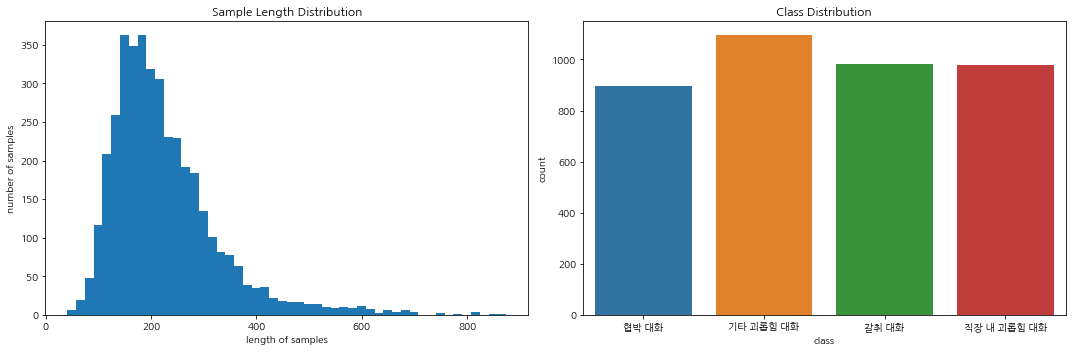

In [28]:
x_train = train_data['conversation']
y_train = train_data['class']

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 데이터 클래스별 길이 분포 확인

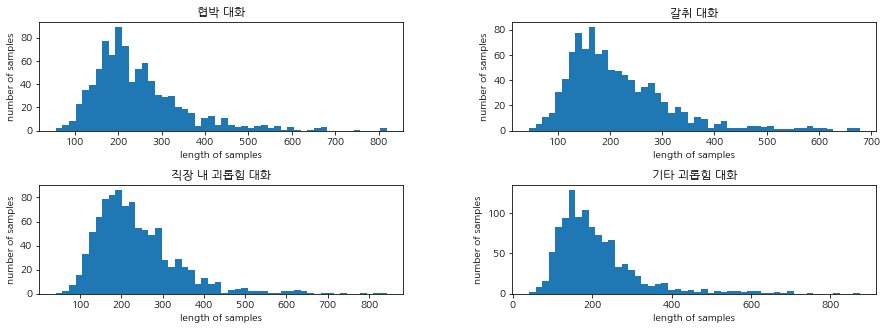

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

## Preprocessing

일반대화 예시

```json
{
	"id": {
		"text": "이거 들어봐 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래"
	}
}
```

In [19]:
import json
with open('./data/test.json') as f:
    test_data = json.load(f)

test_data = pd.DataFrame(test_data).T
test_data.reset_index(drop=True)

In [40]:
test_data = pd.DataFrame.from_dict(data=test_data).T.reset_index(drop=True)

In [41]:
test_data

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...
495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


## Modeling

## Tuning